In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [24]:
import matplotlib.pyplot as plt

In [25]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0,validation_split=0.15)

In [26]:
train_generator = train_datagen.flow_from_directory(
'data/train/',
target_size=(150, 150),
batch_size=10,
class_mode='binary',
subset='training')

Found 21250 images belonging to 2 classes.


In [27]:
validation_generator = train_datagen.flow_from_directory(
'data/train/',
target_size=(150, 150),
batch_size=10,
class_mode='binary',
subset='validation')

Found 3750 images belonging to 2 classes.


In [28]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [29]:
from tensorflow.keras.optimizers import RMSprop

In [30]:
model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['acc'])

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/100
100/100 - 14s - loss: 0.6939 - acc: 0.4690 - val_loss: 0.6939 - val_acc: 0.4820 - 14s/epoch - 138ms/step
Epoch 2/100
100/100 - 12s - loss: 0.6936 - acc: 0.5040 - val_loss: 0.6930 - val_acc: 0.5140 - 12s/epoch - 121ms/step
Epoch 3/100
100/100 - 12s - loss: 0.6937 - acc: 0.4920 - val_loss: 0.6929 - val_acc: 0.5100 - 12s/epoch - 119ms/step
Epoch 4/100
100/100 - 12s - loss: 0.6940 - acc: 0.4940 - val_loss: 0.6931 - val_acc: 0.5340 - 12s/epoch - 117ms/step
Epoch 5/100
100/100 - 12s - loss: 0.6923 - acc: 0.4930 - val_loss: 0.6903 - val_acc: 0.5380 - 12s/epoch - 121ms/step
Epoch 6/100
100/100 - 13s - loss: 0.6925 - acc: 0.5250 - val_loss: 0.6951 - val_acc: 0.4720 - 13s/epoch - 129ms/step
Epoch 7/100
100/100 - 14s - loss: 0.6826 - acc: 0.5360 - val_loss: 0.6999 - val_acc: 0.5400 - 14s/epoch - 138ms/step
Epoch 8/100
100/100 - 13s - loss: 0.6959 - acc: 0.5700 - val_loss: 0.6997 - val_acc: 0.5280 - 13s/epoch - 134ms/step
Epoch 9/100
100/100 - 13s - loss: 0.6780 - acc: 0.5910 - val_los

Epoch 71/100
100/100 - 11s - loss: 0.3642 - acc: 0.8430 - val_loss: 0.3487 - val_acc: 0.8560 - 11s/epoch - 106ms/step
Epoch 72/100
100/100 - 10s - loss: 0.3731 - acc: 0.8340 - val_loss: 0.3927 - val_acc: 0.8260 - 10s/epoch - 104ms/step
Epoch 73/100
100/100 - 10s - loss: 0.3476 - acc: 0.8490 - val_loss: 0.4198 - val_acc: 0.8280 - 10s/epoch - 102ms/step
Epoch 74/100
100/100 - 10s - loss: 0.3438 - acc: 0.8580 - val_loss: 0.3833 - val_acc: 0.8580 - 10s/epoch - 100ms/step
Epoch 75/100
100/100 - 10s - loss: 0.3182 - acc: 0.8640 - val_loss: 0.5230 - val_acc: 0.8060 - 10s/epoch - 101ms/step
Epoch 76/100
100/100 - 10s - loss: 0.3421 - acc: 0.8660 - val_loss: 0.3743 - val_acc: 0.8220 - 10s/epoch - 102ms/step
Epoch 77/100
100/100 - 11s - loss: 0.3329 - acc: 0.8650 - val_loss: 0.4432 - val_acc: 0.8240 - 11s/epoch - 114ms/step
Epoch 78/100
100/100 - 11s - loss: 0.3477 - acc: 0.8450 - val_loss: 0.5546 - val_acc: 0.7620 - 11s/epoch - 105ms/step
Epoch 79/100
100/100 - 10s - loss: 0.3420 - acc: 0.8600 

In [32]:
model.save("catdog.h5", overwrite=True)

In [33]:
model = tf.keras.models.load_model("catdog.h5")

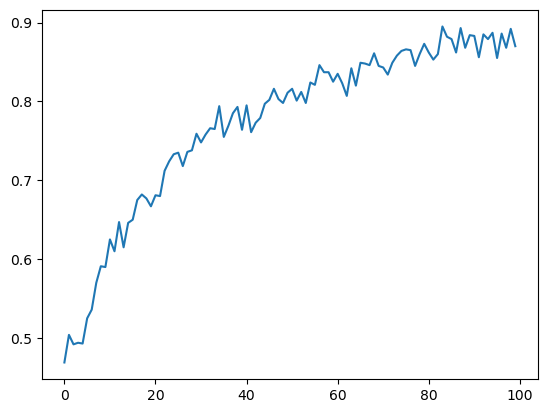

In [34]:
plt.plot(history.history['acc'])